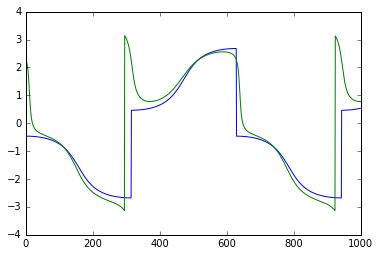

In [106]:
x=np.arange(0,10,0.01)
#plt.plot(x)
plt.plot(-np.arctan2(np.sin(x),np.sin(2*x)))
noise=0.05
plt.plot(-np.arctan2(np.sin(x)- 0.2 + np.random.uniform(-noise, noise),
                     np.sin(2*x)- 0.2 + np.random.uniform(-noise, noise)))
plt.show()

In [6]:
from coupling_analysis import *
data = np.loadtxt('IO/signal.txt')
t_original = data[:, 0]
wsol = data[:, 1:]
fs = 1 / (t_original[1] - t_original[0])

X = wsol[:, 0::2]
Y = wsol[:, 1::2]
N = X.shape[1]

# normal
theta_original = -np.arctan2(Y, X)

# noisy
# noise = 0.05
# theta_original = -np.arctan2(Y - 0.2 + np.random.uniform(-noise, noise), X - 0.2 + np.random.uniform(-noise, noise))

'''plt.plot(t[:200], theta_original[12:212,0])#len(theta_original)-12, :])
plt.show()
plt.plot(t[:200], theta[12:212,0])#:len(theta)-12, :])
plt.show()'''

ph = true_phases(theta_original.T)

dphi_original, phi_original = phi_dot(ph, fs)

cf, qcf = fourier_coeff(phi_original.T, dphi_original.T, order=5)

q, n, o = q_norms(qcf)
print('Coupling:\n', q, '\nnorm:', n, '\nomega:', o)

wyznacznik: (-0+0j)
(11, 11, 11)
5
Coupling:
 [[  623.24380776   390.84515299   357.16455731]
 [  769.05184775  1217.28917924   656.26675032]
 [ 1918.88356771  1796.60188835  3723.78269474]] 
norm: [  810.69488398  1550.79946018  4342.85385309] 
omega: [ 176.5688401   101.85661095  826.2352005 ]


0->1->2->0 OK

In [3]:
phi = phi_original.T

# wrapped
theta_mod = theta_original # np.mod(theta, 2*np.pi)
phi_mod = np.mod(phi, 2*np.pi)

# unwrapped
theta = np.unwrap(theta_original, axis=0)
phi = np.unwrap(phi, axis=0)

In [4]:
sl = 12
end = len(theta_original)-sl

theta = theta[sl:end, :]
theta_mod = theta_mod[sl:end, :]
#phi = phi[sl:end, :]
#phi_mod = phi_mod[sl:end, :]
t = t_original[sl:end]

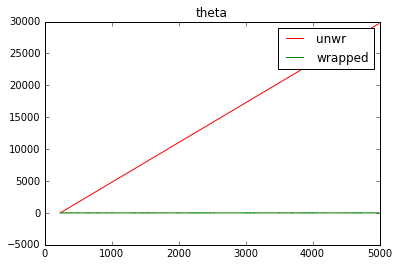

In [5]:
plt.plot(t, theta[:, 0], color="r", label="unwr")
plt.plot(t, theta_mod[:, 0], color="g", label="wrapped")
#plt.plot(t[:end], np.unwrap(theta[:end, 0]), color="b", label="unwr2")
plt.title("theta")
plt.legend()
plt.show()

In [6]:
def natural_freq(time, proto_phases):
    r, c = proto_phases.shape
    ax = 1
    if r > c:
        ax = 0
    proto_phases = np.unwrap(proto_phases, axis=ax)
    freq = (proto_phases[-1] - proto_phases[0])/(time[-1] - time[0])
    return freq # omega_0

In [10]:
omega = natural_freq(t_original, theta_original)

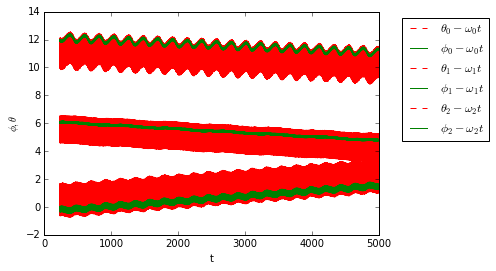

In [8]:
N=3
for osc in range(N):
    th0 = theta[0, osc] - omega[osc]*t[0]
    phi0 = phi[0, osc] - omega[osc]*t[0]
    plt.plot(t, theta[:, osc] - omega[osc]*t - th0 + osc*6, 
             linestyle='--', color="r", label=r"$\theta_{} - \omega_{} t$".format(str(osc), str(osc)))
    plt.plot(t, phi[:, osc] - omega[osc]*t - phi0 + osc*6, 
             color="g", label=r"$\phi_{} - \omega_{} t$".format(str(osc), str(osc)))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
#plt.legend(bbox_to_anchor=(0., -0.3, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)
plt.xlabel("t")
plt.ylabel(r"$\phi, \theta$")
plt.show()


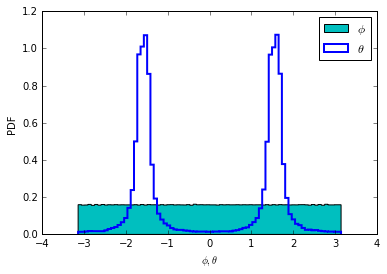

In [9]:
#theta_hist = np.histogram(theta_mod[:, 0])
plt.hist(phi_mod[:, 0]-np.pi, bins=80, normed=True, 
         label=r"$\phi$", histtype="stepfilled", color="c")
plt.hist(theta_mod[:, 0], bins=80, normed=True, 
         label=r"$\theta$", linewidth=2, histtype="step")
plt.legend()
plt.ylabel("PDF")
plt.xlabel(r"$\phi, \theta$")
plt.show()